**Overview of InceptionNet:** InceptionNet, introduced as **GoogLeNet** in 2014, marked a breakthrough in deep learning by winning the **ImageNet Large Scale Visual Recognition Challenge (ILSVRC)**. Its **Inception modules** revolutionized convolutional neural networks by efficiently combining multiple convolutional filters (1x1, 3x3, 5x5) in parallel, allowing the network to capture features at various scales. This architecture significantly reduced computational cost while improving accuracy, making it a pioneering model for deep neural networks. Subsequent versions, such as InceptionV2, V3, and V4, introduced further optimizations, cementing InceptionNet’s significance in advancing image recognition tasks and deep learning efficiency.

Here is an overview of the major versions of **InceptionNet** (V1 through V4), focusing on their modular improvements:

### **InceptionV1 (GoogLeNet, 2014)**:
- **Key Feature**: Introduction of the **Inception module**, combining parallel 1x1, 3x3, 5x5 convolutions, and max pooling in a single layer.
- **Purpose**: Allowed the network to capture features at multiple scales, reducing computational cost with **1x1 convolutions**.
- **Success**: Won the **ImageNet Challenge (ILSVRC)** in 2014, with significantly fewer parameters than contemporary architectures like VGGNet.

### **InceptionV2 (2015)**:
- **Key Improvements**:
  - **Batch Normalization**: Introduced to stabilize and speed up training, which reduced internal covariate shift.
  - **Factorized convolutions**: 5x5 convolutions were split into two 3x3 convolutions, further reducing computational cost.
  - **Increased Depth**: Deeper networks to improve performance without drastically increasing parameters.

### **InceptionV3 (2016)**:
- **Key Improvements**:
  - **Factorized convolutions** extended: 3x3 convolutions were split into 1x3 and 3x1 convolutions to increase efficiency.
  - **RMSProp Optimizer**: Implemented for more stable training.
  - **Auxiliary Classifiers**: Used to combat vanishing gradients in deeper networks.
  - **Label Smoothing**: Added to reduce overconfidence in predictions, improving generalization.
  - **Grid Size Reduction**: Used a more effective method to reduce the resolution of feature maps while retaining useful information.

### **InceptionV4 (2016)**:
- **Key Improvements**:
  - **Increased Modularity**: Combined ideas from Inception and **Residual Networks (ResNet)** for better gradient flow.
  - **Residual Connections**: Introduced in Inception modules to improve the training of very deep networks.
  - **Deeper Architecture**: Further increased the depth and complexity, with more layers for better feature extraction.

---

### **Summary**:
- **InceptionV1** introduced the groundbreaking Inception module, which efficiently captured multi-scale features.
- **InceptionV2** optimized this with batch normalization and factorized convolutions for more efficient computation.
- **InceptionV3** further enhanced these ideas with new regularization techniques and additional factorization.
- **InceptionV4** merged the power of Inception with ResNet’s residual connections, improving deep network training and performance.

**Architecture:** The **InceptionNet architecture** features **Inception modules**, which are its core innovation. Unlike traditional convolutional layers that use a fixed filter size, Inception modules apply multiple filters (1x1, 3x3, 5x5) in parallel, capturing features at various scales. Additionally, max pooling is performed in parallel to convolution, and the outputs are concatenated along the depth dimension. This approach allows the network to extract spatial information more efficiently, while **1x1 convolutions** reduce the number of parameters. InceptionNet significantly improves computational efficiency and accuracy by handling multi-scale features in a single layer, outperforming conventional convolutional networks.

Here is an overview of how **InceptionNet architecture** works and a visual explanation of the flow of operations within an **Inception module**:

### **Flow of Operations in InceptionNet Architecture**:
1. **Input Layer**: The network starts with an image input, typically of a fixed size (e.g., 224x224x3 for RGB images).

2. **Convolutional Layers**: The input is passed through several standard convolutional layers to extract basic features like edges, textures, and colors.

3. **Inception Module**:
   - The input feature map is passed through four parallel paths within the **Inception module**:
     1. **1x1 Convolution**: Captures fine details and reduces the number of channels.
     2. **3x3 Convolution**: Captures medium-sized features.
     3. **5x5 Convolution**: Captures larger features.
     4. **3x3 Max Pooling**: Reduces spatial dimensions while retaining important information.
   - **Concatenation**: The outputs from all paths are concatenated along the depth dimension (channels), combining different-scale features into a single feature map.

4. **Reduction Layers**: Occasionally, pooling layers are used to reduce the size of the feature maps and prevent the model from becoming too computationally expensive.

5. **Fully Connected Layer**: After passing through several layers of Inception modules and convolution, the final feature map is flattened into a fully connected layer for classification.

6. **Softmax Layer**: Outputs class probabilities for the final prediction.



Here is a visual diagram of the **InceptionNet architecture** that illustrates the flow of operations, from input to convolutional layers, Inception modules, reduction layers, and the fully connected classification layer with softmax. Each part is labeled to clarify the flow of data through the network.

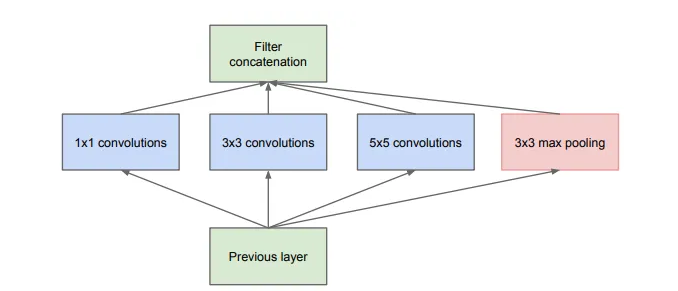

**Figure:** Inception module with naive version (Picture Courtesy: Original Source / https://gghantiwala.medium.com/understanding-the-architecture-of-the-inception-network-and-applying-it-to-a-real-world-dataset-169874795540 )

The Inception network architecture enables the use of filters of various sizes without necessitating an increase in the network's depth. Instead of connecting each filter sequentially, different filters are applied in parallel. This is referred to as the naive version of the Inception model. The main issue with this model was the excessive number of parameters. To address this, a revised architecture was developed.

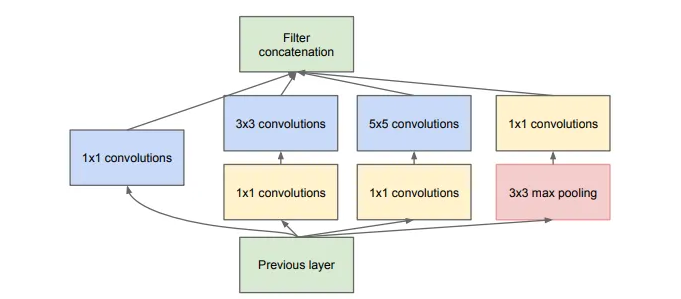

**Figure:** Inception module with dimension reductions  (Picture Courtesy: Original Source / https://gghantiwala.medium.com/understanding-the-architecture-of-the-inception-network-and-applying-it-to-a-real-world-dataset-169874795540 )

**Description of CIFAR-10 Dataset:**
The **CIFAR-10** dataset includes 10 classes: **airplane, automobile, bird, cat, deer, dog, frog, horse, ship,** and **truck**. Each class contains 6,000 32x32 color images, providing a balanced set for evaluating image classification algorithms in machine learning.

**Applications of InceptionNet:** InceptionNet is used in various applications, including image classification, object detection, and image segmentation. Its modular architecture enables efficient feature extraction, making it suitable for medical image analysis, autonomous driving, facial recognition, and real-time video processing in diverse domains.

In [10]:
import torch                                              #This line imports the PyTorch library for providing functionalities for tensor operations, automatic differentiation, and neural network construction.
import torch.nn as nn                                     #This imports the torch.nn module and aliases it as nn. It includes layers, loss functions, and other components necessary for constructing and training neural networks.
import torch.optim as optim                               #This imports the torch.optim module, aliasing it as optim. This module contains optimization algorithms (such as SGD, Adam, etc.) that are used to update the model parameters during training.
import torchvision                                        #This imports the torchvision library, which provides tools for computer vision tasks. It includes datasets, model architectures, and image transformations, making it easier to work with visual data in PyTorch.
import torchvision.transforms as transforms               #This line imports the transforms module from torchvision and aliases it as transforms. The transforms module contains various image transformation functions that can be applied to datasets, such as resizing, normalization, and data augmentation, which are essential for preparing image data before feeding it into a model.
from torchvision.models import inception_v3  # Using pre-trained InceptionV3 model

# Transformations (Resize CIFAR-10 images to 299x299)
transform = transforms.Compose([    # This line creates a composition of transformations to be applied to the images in the dataset. The Compose method allows you to combine multiple image transformation functions into a single callable object, making it easy to preprocess the images before they are fed into the model.
    transforms.Resize((299, 299)),  # Resize to 299x299 as expected by InceptionV3
    transforms.ToTensor(),          # This transformation converts the image from a PIL image or a NumPy array into a PyTorch tensor.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # The step performs RGB normalization. In this case, it normalizes each channel to have a mean of 0.5 and a standard deviation of 0.5.
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)  #This line loads the CIFAR-10 dataset from the torchvision.datasets module. root='./data': Specifies the directory where the dataset will be stored or loaded from.  train=True: Indicates that the training split of the dataset should be loaded. download=True: This parameter ensures that the dataset is downloaded if it is not already available in the specified directory. transform=transform: Applies the previously defined transformations (resizing, conversion to tensor, and normalization) to each image in the dataset.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)    #This line creates a DataLoader object, which is a PyTorch utility that allows for easy iteration over the dataset during training. It handles batching, shuffling, and loading data in parallel using multiple workers. shuffle=True: Indicates that the dataset should be shuffled at the beginning of each epoch, which helps to reduce overfitting by ensuring that the model does not learn the order of the training data.

# Define model (InceptionV3, pretrained)
model = inception_v3(pretrained=True, aux_logits=True)  # Set aux_logits to True if you want to use auxiliary loss
model.fc = nn.Linear(2048, 10)  # Modify the final layer for CIFAR-10 (10 classes)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # Train for 5 epochs
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU if available

        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model(inputs)  # InceptionV3 returns InceptionOutputs with two values (logits, aux_logits)

        # Use only the main logits for the loss function
        loss = criterion(outputs.logits, labels)

        # Backpropagation
        loss.backward()
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/5], Loss: {running_loss / len(trainloader):.4f}")

print('Finished Training')


Files already downloaded and verified
Epoch [1/5], Loss: 0.7819
Epoch [2/5], Loss: 0.4513
Epoch [3/5], Loss: 0.3476
Epoch [4/5], Loss: 0.2757
Epoch [5/5], Loss: 0.2247
Finished Training


The decreasing loss values from epoch to epoch indicate that the model is learning and improving its performance as it adjusts its weights based on the training data.
Epoch 1 had the highest loss, suggesting the model was initially poorly fitted to the data. As training progressed, the model made adjustments, leading to progressively lower loss values.